# Goals and Overview

The goal of this project is to analyze the clients' behavior and determine which prepaid plan brings in more revenue. I will begin by reviewing the data, for gaining insight from the information but also for finding and correcting any errors as well as converting the data to the necessary types.

# Project

## Initialization

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st
import math

## Loading Data

In [2]:
df_calls = pd.read_csv('./datasets/megaline_calls.csv')
df_internet = pd.read_csv('./datasets/megaline_internet.csv')
df_messages = pd.read_csv('./datasets/megaline_messages.csv')
df_plans = pd.read_csv('./datasets/megaline_plans.csv')
df_users = pd.read_csv('./datasets/megaline_users.csv')

### Plans

In [3]:
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [4]:
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


The data for 'df_plans' seems complete and comprehensive. The DF contains only 2 rows, which are the 2 plans available to customers. There is NO missing data, and all columns are appropriately named. All data types are appropriate.

### Users

In [6]:
df_users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


In [8]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


The column names appear appropriate for the dataset. The missing values in the 'churn_date' column are expected, as they indicate customers who are currently active and have not yet churned. The 'reg_date' column is currently stored as an object datatype, which will be converted to datetime format for future analysis. In the 'city' column, all entries contain the string 'MSA', which will be updated to 'USA'. No other issues have been identified in the dataset.

__Duplicate Data__

In [35]:
print(df_users.duplicated().sum())
df_users['city'] = df_users['city'].str.replace('MSA', 'USA')
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'])
df_users

0


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA USA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA USA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV USA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK USA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA USA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA USA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA USA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA USA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA USA",2018-02-04,surf,NaN


### Internet

In [9]:
df_internet

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


In [10]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


__Duplicate Data__

In [25]:
print(df_internet.duplicated().sum())
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])
df_internet

0


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


### Calls

In [11]:
df_calls

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


In [12]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


__Duplicate Data__

In [17]:
print(df_calls.duplicated().sum())
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])
df_calls

0


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


In [18]:
df_calls['duration_rnd'] = np.ceil(df_calls['duration']).astype('int64')
df_calls

,id,user_id,call_date,duration,duration_rnd
0,1000_93,1000,2018-12-27,8.52,9
1,1000_145,1000,2018-12-27,13.66,14
2,1000_247,1000,2018-12-27,14.48,15
3,1000_309,1000,2018-12-28,5.76,6
4,1000_380,1000,2018-12-30,4.22,5
...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72,9
137731,1499_200,1499,2018-10-20,10.89,11
137732,1499_201,1499,2018-09-21,8.12,9
137733,1499_202,1499,2018-10-10,0.37,1


### Messages

In [13]:
df_messages

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


In [14]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


__Duplicate Data__

In [19]:
print(df_messages.duplicated().sum())
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])
df_messages

0


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


## Plan Review

In [16]:
df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [29]:
user_data = df_calls.groupby([df_calls['user_id'], df_calls['call_date'].dt.month])

calls_in_month = user_data['id'].count()
calls_in_month = calls_in_month.reset_index(name='#_of_calls')
calls_in_month = calls_in_month.rename(
    columns={
        'call_date': 'month'
    }
)
calls_in_month

,user_id,month,#_of_calls
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


Data from the 'df_calls' DF has been grouped by 'user_id' and the 'call_date' month, and assigned to 'user_data'. Using 'count()', the number of rows that appear per user per month has been counted and assigned to 'calls_in_month', and the index is reset so that count is saved as '#_of_calls'. The 'call_date' column name has been changed to 'month', since we only took the month part of the date.

In [30]:
user_minutes = df_calls.groupby([df_calls['user_id'], df_calls['call_date'].dt.month])

duration_in_month = user_minutes['duration_rnd'].sum()
duration_in_month = duration_in_month.reset_index(name='total_duration')
duration_in_month = duration_in_month.rename(
    columns={
        'call_date': 'month'
    }
)
duration_in_month

,user_id,month,total_duration
0,1000,12,124
1,1001,8,182
2,1001,9,315
3,1001,10,393
4,1001,11,426
...,...,...,...
2253,1498,12,339
2254,1499,9,346
2255,1499,10,385
2256,1499,11,308


Data from the 'df_calls' DF has been grouped by 'user_id' and the 'call_date' month, and assigned to 'user_minutes'. Using 'sum()', the total 'duration' of all rows that appear per user per month has been combined and assigned to 'duration_in_month', and the index is reset so the sum is saved as 'total_duration'. The 'call_date' column name has been changed to 'month', since we only took the month part of the date.

In [31]:
user_messages = df_messages.groupby([df_messages['user_id'], df_messages['message_date'].dt.month])

messages_in_month = user_messages['id'].count()
messages_in_month = messages_in_month.reset_index(name='#_of_messages')
messages_in_month = messages_in_month.rename(
    columns={
        'message_date': 'month'
    }
)
messages_in_month

,user_id,month,#_of_messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


Data from the 'df_messages' DF has been grouped by 'user_id' and the 'message_date' month, and assigned to 'user_messages'. Using 'count()', the number of rows that appear per user per month has been counted and assigned to'messages_in_month', and the index is reset so the count is saved as '#_of_messages'. The 'message_date' column name has been changed to 'month', since we only took the month part of the date.

In [32]:
user_net_use = df_internet.groupby([df_internet['user_id'], df_internet['session_date'].dt.month])

mbs_in_month = user_net_use['mb_used'].sum()
mbs_in_month = mbs_in_month.reset_index(name='mb_used')
mbs_in_month = mbs_in_month.rename(
    columns={
        'session_date': 'month'
    }
)
mbs_in_month

,user_id,month,mb_used
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30
...,...,...,...
2272,1498,12,23137.69
2273,1499,9,12984.76
2274,1499,10,19492.43
2275,1499,11,16813.83


Data from the 'df_internet' DF has been grouped by 'user_id' and the 'session_date' month, and assigned to 'user_net_use'. Using 'sum()',the total 'mb_used' of all rows that appear per user per month has been combined and assigned to 'mbs_in_month', and the index is reset so the count is saved as 'mb_used'. The 'session_date' column name has been changed to month, since we only took the month part of the date.

In [33]:
user_data = calls_in_month.merge(messages_in_month, on=['user_id', 'month'], how='left')
user_data = user_data.merge(mbs_in_month, on=['user_id', 'month'], how='left')
user_data = user_data.merge(duration_in_month, on=['user_id', 'month'], how='left')
user_data

,user_id,month,#_of_calls,#_of_messages,mb_used,total_duration
0,1000,12,16,11.0,1901.47,124
1,1001,8,27,30.0,6919.15,182
2,1001,9,49,44.0,13314.82,315
3,1001,10,65,53.0,22330.49,393
4,1001,11,64,36.0,18504.30,426
...,...,...,...,...,...,...
2253,1498,12,39,NaN,23137.69,339
2254,1499,9,41,NaN,12984.76,346
2255,1499,10,53,NaN,19492.43,385
2256,1499,11,45,NaN,16813.83,308


Using 'merge()', the aggregated data has been merged by 'user_id' and 'month'. 'user_data', 'messages_in_month', 'mbs_in_month', and 'total_duration' are the DF's that have been merged.

In [34]:
user_data = pd.merge(user_data, df_users, on='user_id', how='left')
print(user_data.isna().sum())
user_data['#_of_messages'] = user_data['#_of_messages'].fillna(0)
user_data['mb_used'] = user_data['mb_used'].fillna(0)
print(user_data.isna().sum())
user_data

user_id              0
month                0
#_of_calls           0
#_of_messages      485
mb_used             15
total_duration       0
first_name           0
last_name            0
age                  0
city                 0
reg_date             0
plan                 0
churn_date        2100
dtype: int64
user_id              0
month                0
#_of_calls           0
#_of_messages        0
mb_used              0
total_duration       0
first_name           0
last_name            0
age                  0
city                 0
reg_date             0
plan                 0
churn_date        2100
dtype: int64


,user_id,month,#_of_calls,#_of_messages,mb_used,total_duration,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,12,16,11.0,1901.47,124,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,8,27,30.0,6919.15,182,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1001,9,49,44.0,13314.82,315,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
3,1001,10,65,53.0,22330.49,393,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
4,1001,11,64,36.0,18504.30,426,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2253,1498,12,39,0.0,23137.69,339,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN
2254,1499,9,41,0.0,12984.76,346,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN
2255,1499,10,53,0.0,19492.43,385,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN
2256,1499,11,45,0.0,16813.83,308,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN


Using 'merge()', 'user_data' has been merged by 'user_id', with 'df_users' so that all information per 'user_id' is included in 'user_data'. Missing values for '#_of_messages' and 'mbs_used' have been changed to zero, as those missing values indicate no data was used for that service.

In [36]:
def calc_user_revenue(user):
    extra_minutes = 0
    extra_messages = 0
    extra_gigas = 0
    mo_price = 0

    surf_min_limit = 500
    surf_msg_limit = 50
    surf_mb_limit = 15360

    ult_min_limit = 3000
    ult_msg_limit = 500
    ult_mb_limit = 30720

    x_min_cost = 0 
    x_msg_cost = 0
    x_gb_cost = 0

    if user['plan'] == 'surf':

        mo_price = 20

        if user['total_duration'] > surf_min_limit:
            extra_minutes = user['total_duration'] - surf_min_limit
            
        if user['#_of_messages'] > surf_msg_limit:
            extra_messages = user['#_of_messages'] - surf_msg_limit

        if user['mb_used'] > surf_mb_limit:
            extra_megas = user['mb_used'] - surf_mb_limit
            extra_gigas = math.ceil(extra_megas / 1024)

        x_min_cost = extra_minutes * 0.03
        x_msg_cost = extra_messages * 0.03
        x_gb_cost = extra_gigas * 10
        
    if user['plan'] == 'ultimate':

        mo_price = 70

        if user['total_duration'] > ult_min_limit:
            extra_minutes = user['total_duration'] - ult_min_limit
            
        if user['#_of_messages'] > ult_msg_limit:
            extra_messages = user['#_of_messages'] - ult_msg_limit

        if user['mb_used'] > ult_mb_limit:
            extra_megas = user['mb_used'] - ult_mb_limit
            extra_gigas = math.ceil(extra_megas / 1024)
       
        x_min_cost = extra_minutes * 0.01
        x_msg_cost = extra_messages * 0.01
        x_gb_cost = extra_gigas * 7
         
    user_total = mo_price + x_min_cost + x_msg_cost + x_gb_cost
    return user_total

user_data['monthly_bill'] = user_data.apply(calc_user_revenue, axis=1)
user_data

,user_id,month,#_of_calls,#_of_messages,mb_used,total_duration,first_name,last_name,age,city,reg_date,plan,churn_date,monthly_bill
0,1000,12,16,11.0,1901.47,124,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,70.00
1,1001,8,27,30.0,6919.15,182,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,20.00
2,1001,9,49,44.0,13314.82,315,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,20.00
3,1001,10,65,53.0,22330.49,393,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,90.09
4,1001,11,64,36.0,18504.30,426,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2253,1498,12,39,0.0,23137.69,339,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN,100.00
2254,1499,9,41,0.0,12984.76,346,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,20.00
2255,1499,10,53,0.0,19492.43,385,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,70.00
2256,1499,11,45,0.0,16813.83,308,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,40.00


## EDA

### Call Duration

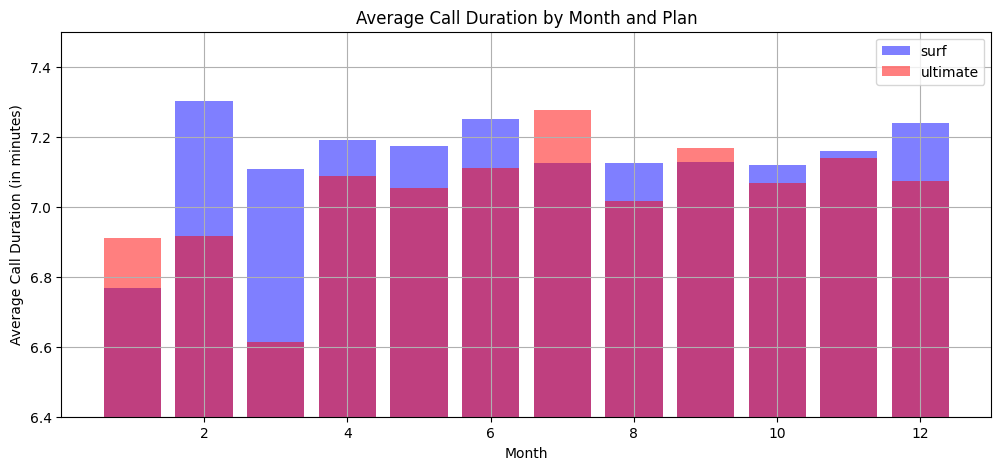

In [42]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.
agg_dict = {'total_duration': 'sum', '#_of_calls': 'sum', 'user_id': 'count'}
grp = user_data.groupby(['plan', 'month'])
month_call_data = grp.agg(agg_dict)
month_call_data = month_call_data.rename(
    columns={
        'user_id': '#_of_users'
    }
)
month_call_data['average_call_duration'] = month_call_data['total_duration'] / month_call_data['#_of_calls']
month_call_data = month_call_data.reset_index()

colors = {'surf': 'blue', 'ultimate': 'red'}

plt.figure(figsize=(12, 5))

for plan, data in month_call_data.groupby('plan'):
    plt.bar(data['month'], data['average_call_duration'], color=colors[plan], label=plan, alpha=0.5)

plt.xlabel('Month')
plt.ylabel('Average Call Duration (in minutes)')
plt.title('Average Call Duration by Month and Plan')
plt.ylim([6.4, 7.5])
plt.legend()
plt.grid(True)

plt.show()

In [43]:
month_call_data

,plan,month,total_duration,#_of_calls,#_of_users,average_call_duration
0,surf,1,406,60,2,6.766667
1,surf,2,2673,366,9,7.303279
2,surf,3,7590,1068,23,7.106742
3,surf,4,17577,2444,50,7.191899
4,surf,5,30768,4289,75,7.173700
5,surf,6,41836,5769,96,7.251863
6,surf,7,54448,7642,120,7.124836
7,surf,8,66438,9325,159,7.124718
8,surf,9,80360,11273,191,7.128537
9,surf,10,101846,14303,232,7.120604


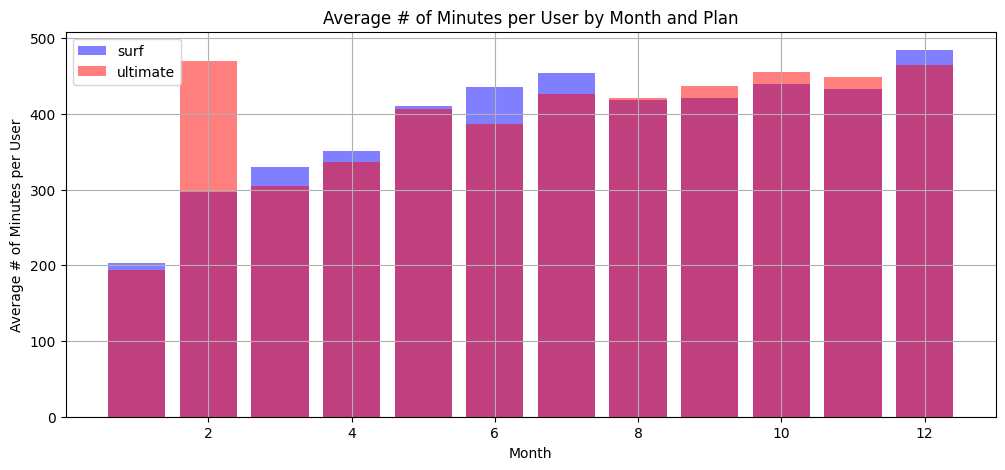

In [40]:
month_call_data['avg_min_needed'] = month_call_data['total_duration'] / month_call_data['#_of_users']
colors = {'surf': 'blue', 'ultimate': 'red'}

plt.figure(figsize=(12, 5))

for plan, data in month_call_data.groupby('plan'):
    plt.bar(data['month'], data['avg_min_needed'], color=colors[plan], label=plan, alpha=0.5)

plt.xlabel('Month')
plt.ylabel('Average # of Minutes per User')
plt.title('Average # of Minutes per User by Month and Plan')
plt.legend()
plt.grid(True)

plt.show()

In [41]:
month_call_data

,plan,month,total_duration,#_of_calls,#_of_users,average_call_duration,avg_min_needed
0,surf,1,406,60,2,6.766667,203.000000
1,surf,2,2673,366,9,7.303279,297.000000
2,surf,3,7590,1068,23,7.106742,330.000000
3,surf,4,17577,2444,50,7.191899,351.540000
4,surf,5,30768,4289,75,7.173700,410.240000
5,surf,6,41836,5769,96,7.251863,435.791667
6,surf,7,54448,7642,120,7.124836,453.733333
7,surf,8,66438,9325,159,7.124718,417.849057
8,surf,9,80360,11273,191,7.128537,420.732984
9,surf,10,101846,14303,232,7.120604,438.991379


In [44]:
monthly_call_duration_stats = user_data.groupby(['plan', 'month'])['total_duration'].agg(['mean', 'var'])
monthly_call_duration_stats

mean           var
plan     month                          
surf     1      203.000000  15842.000000
         2      297.000000  52226.500000
         3      330.000000  35809.363636
         4      351.540000  50866.743265
         5      410.240000  56938.779459
         6      435.791667  44094.061404
         7      453.733333  59802.012325
         8      417.849057  52122.749224
         9      420.732984  44579.912538
         10     438.991379  49326.952306
         11     432.494585  48748.787108
         12     484.501608  59882.373385
ultimate 1      193.500000  16572.333333
         2      470.333333  54345.066667
         3      304.250000  61984.931818
         4      336.857143  34888.928571
         5      406.241379  43841.046798
         6      387.444444  37902.570707
         7      427.067797  72563.374635
         8      421.436620  53645.506640
         9      437.511628  57070.464569
         10     455.028571  52811.566484
         11     448.730159  59479.782603
         12     465.261745  60461.924270

In terms of calls, 'surf' plan users tend to have longer average call durations, as well as tend to need more minutes than 'ultimate' plan users but not by much. The average call duration for both are similar across the months, with the average call being about 7 minutes. Neither group tend to have more than 500 minute durations each month.

### Messages

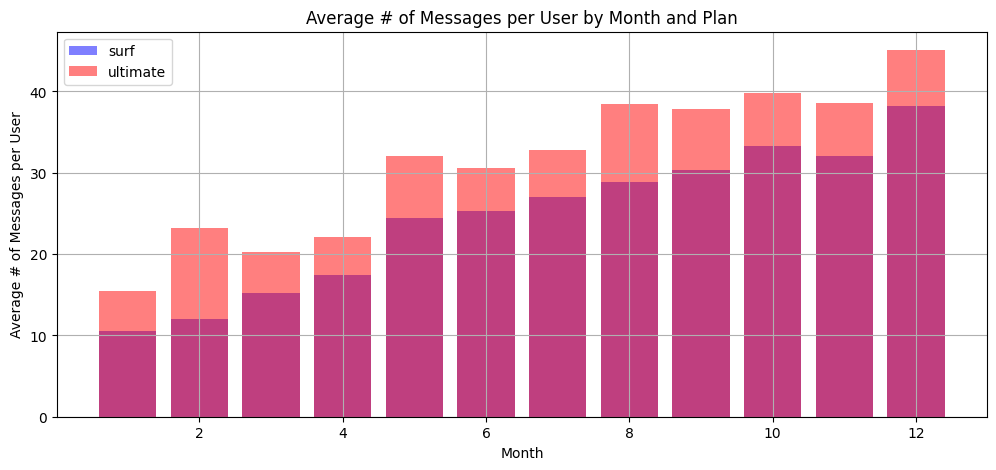

In [45]:
monthly_msg_stats = user_data.groupby(['plan', 'month'])['#_of_messages'].mean().reset_index(name='average_msgs_x_user')
colors = {'surf': 'blue', 'ultimate': 'red'}

plt.figure(figsize=(12, 5))

for plan, data in monthly_msg_stats.groupby('plan'):
    plt.bar(data['month'], data['average_msgs_x_user'], color=colors[plan], label=plan, alpha=0.5)

plt.xlabel('Month')
plt.ylabel('Average # of Messages per User')
plt.title('Average # of Messages per User by Month and Plan')
plt.legend()
plt.grid(True)
plt.show()


In [46]:
monthly_msg_stats

,plan,month,average_msgs_x_user
0,surf,1,10.500000
1,surf,2,12.000000
2,surf,3,15.260870
3,surf,4,17.400000
4,surf,5,24.386667
5,surf,6,25.281250
6,surf,7,27.025000
7,surf,8,28.855346
8,surf,9,30.376963
9,surf,10,33.267241


<Axes: title={'center': 'Internet Traffic Consumed by Users per Plan'}, xlabel='plan', ylabel='GBs Used'>

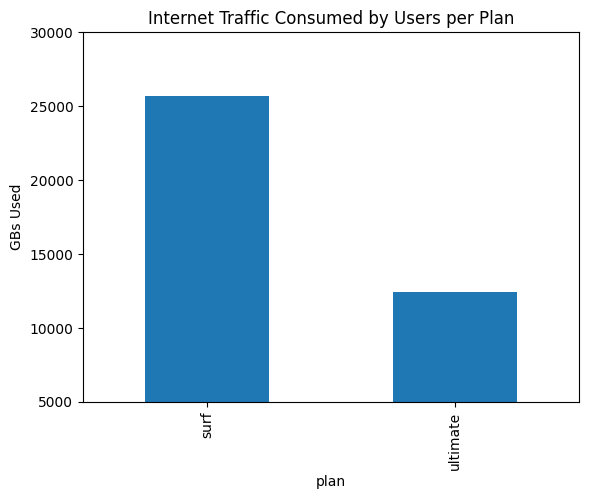

In [47]:
user_data['gb_used'] = user_data['mb_used'] / 1024
user_data['gb_used'] = np.ceil(user_data['gb_used']).astype('int64')

net_use_stats = user_data.groupby('plan')['gb_used'].sum().reset_index()
net_use_stats.plot(
    title='Internet Traffic Consumed by Users per Plan',
    kind='bar',
    ylim=[5000, 30000],
    x='plan',
    legend=False,
    y='gb_used',
    ylabel='GBs Used')


In [48]:
net_use_stats

,plan,gb_used
0,surf,25678
1,ultimate,12385


I'm not sure if the sequencing of the segments got messed up, the above chart is part of the 'Internet' data which is the segment that follows. Directly below, I give conclusions about messaging, while the chart above is from 'Internet' data.

In terms of messaging, users of the 'ultimate' plan send more messages on average, with the exception of the first month in which users of both plans send similar amounts of messages. Month 12 has the most amount of messages sent, with 'surf' plan users even exceeding the amount of messages 'ultimate' plan users sent any other month on average, however even at this peak users from both plans do not tend to exceed their message limit. There is a slight upward trend in messages sent as the months go by, more evident with 'surf' plan users, although this may be because there are more users to draw data from as the months go by.

### Internet

<Axes: title={'center': 'Internet Data Consumed by Users per Plan'}, xlabel='plan', ylabel='GBs Used'>

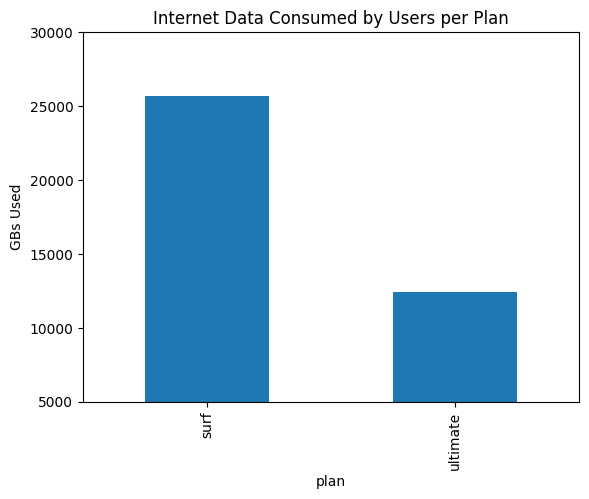

In [49]:
user_data['gb_used'] = user_data['mb_used'] / 1024
user_data['gb_used'] = np.ceil(user_data['gb_used']).astype('int64')

net_use_stats = user_data.groupby('plan')['gb_used'].sum().reset_index()
net_use_stats.plot(
    title='Internet Data Consumed by Users per Plan',
    kind='bar',
    ylim=[5000, 30000],
    x='plan',
    legend=False,
    y='gb_used',
    ylabel='GBs Used')

In [50]:
net_use_stats

,plan,gb_used
0,surf,25678
1,ultimate,12385


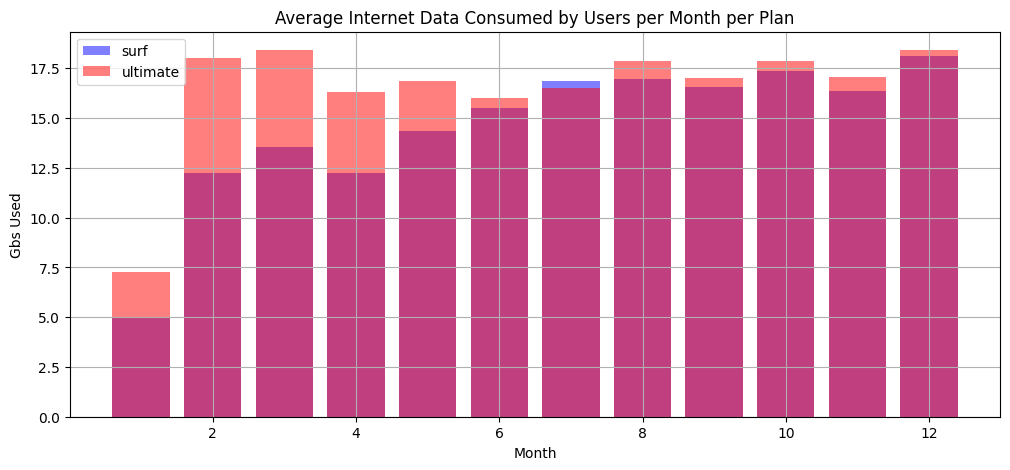

In [51]:
agg_dict = {'gb_used': 'sum', 'user_id': 'count'}
grp = user_data.groupby(['plan', 'month'])
month_net_use = grp.agg(agg_dict)
month_net_use = month_net_use.reset_index()
month_net_use = month_net_use.rename(
    columns={
        'user_id': '#_of_users'
    })

month_net_use['avg_gb_per_user'] = month_net_use['gb_used'] / month_net_use['#_of_users']

colors = {'surf': 'blue', 'ultimate': 'red'}

plt.figure(figsize=(12, 5))

for plan, data in month_net_use.groupby('plan'):
    plt.bar(data['month'], data['avg_gb_per_user'], color=colors[plan], label=plan, alpha=0.5)

plt.xlabel('Month')
plt.ylabel('Gbs Used')
plt.title('Average Internet Data Consumed by Users per Month per Plan')
plt.legend()
plt.grid(True)

plt.show()

In [52]:
month_net_use

,plan,month,gb_used,#_of_users,avg_gb_per_user
0,surf,1,10,2,5.000000
1,surf,2,110,9,12.222222
2,surf,3,312,23,13.565217
3,surf,4,611,50,12.220000
4,surf,5,1078,75,14.373333
5,surf,6,1487,96,15.489583
6,surf,7,2025,120,16.875000
7,surf,8,2696,159,16.955975
8,surf,9,3160,191,16.544503
9,surf,10,4024,232,17.344828


In terms of internet consumption, while the 'surf' plan has twice as much data consumption it also has more users. The average data use per user per plan is roughly the same, with each user consuming about 15-17 GB's on average. For 'ultimate' users this falls below their limit, but the average 'surf' plan user may sometimes have to purchase an additional GB each month. There is little internet consumption in the first month for both plans.

### Revenue

In [53]:
total_revenue = user_data.groupby(['plan'])['monthly_bill'].sum()

agg_dict = {'monthly_bill': 'sum', 'user_id': 'count'}
grp = user_data.groupby(['plan', 'month'])
monthly_revenue = grp.agg(agg_dict)
monthly_revenue = monthly_revenue.rename(
    columns={
        'monthly_bill': 'monthly_revenue',
        'user_id': '#_of_users'
    })

monthly_revenue = monthly_revenue.reset_index()
monthly_revenue['avg_user_revenue'] = monthly_revenue['monthly_revenue'] / monthly_revenue['#_of_users']
monthly_revenue

,plan,month,monthly_revenue,#_of_users,avg_user_revenue
0,surf,1,40.00,2,20.000000
1,surf,2,309.57,9,34.396667
2,surf,3,1056.65,23,45.941304
3,surf,4,2035.53,50,40.710600
4,surf,5,3627.37,75,48.364933
5,surf,6,4759.80,96,49.581250
6,surf,7,7543.56,120,62.863000
7,surf,8,10236.85,159,64.382704
8,surf,9,10913.47,191,57.138586
9,surf,10,15032.64,232,64.795862


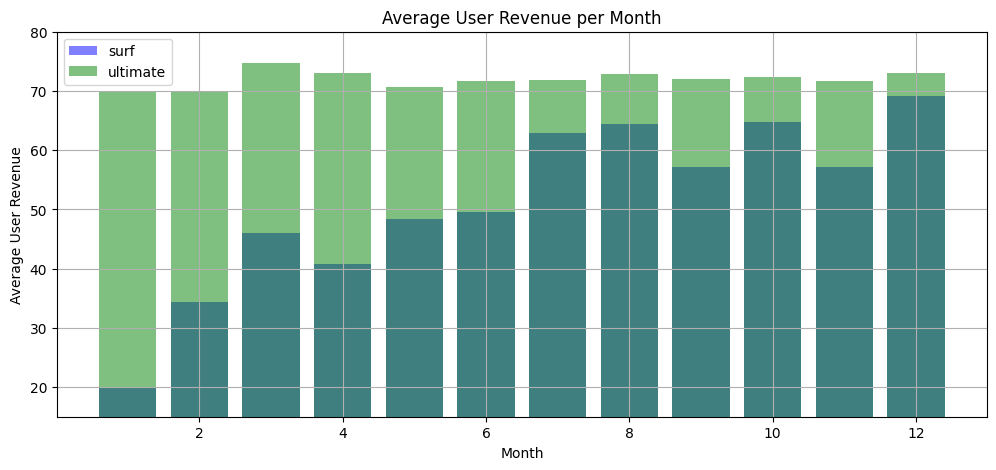

In [54]:
colors = {'surf': 'blue', 'ultimate': 'green'}

plt.figure(figsize=(12, 5))

for plan, data in monthly_revenue.groupby('plan'):
    plt.bar(data['month'], data['avg_user_revenue'], color=colors[plan], label=plan, alpha=0.5)

plt.xlabel('Month')
plt.ylabel('Average User Revenue')
plt.title('Average User Revenue per Month')
plt.legend()
plt.ylim([15, 80])
plt.grid(True)

plt.show()

In terms of revenue per plan, 'ultimate' plan users do not tend to spend much on extra data while 'surf' users will much more often exceed their initial data limits with the average user spending up to $40 for additional data in the later half of the year. This said, the average monthly revenue from 'ultimate' users is considerably higher each month. While the data indicates that the revenue is much higher for the 'surf' plan, this is because the number of users is much higher. Average User Revenue says that an 'ultimate' plan user brings more revenue in than 'surf' plan user.

In [55]:
compared_revenue = user_data.groupby('plan')['monthly_bill'].sum()
compared_revenue

plan
surf        92893.92
ultimate    51534.00
Name: monthly_bill, dtype: float64

## Testing Statistical Hypothesis

In [56]:
surf_bills = user_data[user_data['plan'] == 'surf']['monthly_bill']
ultimate_bills = user_data[user_data['plan'] == 'ultimate']['monthly_bill']

results = st.ttest_ind(surf_bills, ultimate_bills)

print("P-value:", results.pvalue)

alpha = 0.05
if results.pvalue < alpha:
    print("Reject the null hypothesis: There is a statistically significant difference in average revenue between Surf and Ultimate plans.")
else:
    print("Fail to reject the null hypothesis: There is no statistically significant difference in average revenue between Surf and Ultimate plans.")

P-value: 2.308714082575419e-09
Reject the null hypothesis: There is a statistically significant difference in average revenue between Surf and Ultimate plans.


Based on wanting to see if the average revenue from users of 2 calling plans differ, my Null Hypothesis (H0) is: The average revenue from users of Ultimate and Surf calling plans is the same.

Making the Alternative Hypothesis (H1): The average revenue from users of Ultimate and Surf calling plans differs.

I will be using the average user revenue from each plan as the criterion, because this is the target we want to compare.

In [57]:
ny_nj_list = user_data[user_data['city'].str.contains('NY-NJ')]['monthly_bill']
not_ny_nj_list = user_data[~user_data['city'].str.contains('NY-NJ')]['monthly_bill']

results = st.ttest_ind(ny_nj_list, not_ny_nj_list)

print("P-value:", results.pvalue)

alpha = 0.05
if results.pvalue < alpha:
    print("Reject the null hypothesis: There is a statistically significant difference in average revenue from users in the NY-NJ area and that of the users from the other regions.")
else:
    print("Fail to reject the null hypothesis: There is no statistically significant difference in average revenue from users in the NY-NJ area and that of the users from the other regions.")

P-value: 0.01720375613982688
Reject the null hypothesis: There is a statistically significant difference in average revenue from users in the NY-NJ area and that of the users from the other regions.


Based on wanting to see if the average revenue from users in the NY-NJ area is different from that of the users from the other regions, my Null Hypothesis (H0) is: The average revenue from users from the NY_NJ and other regions is the same.

Making the Alternative Hypothesis (H1): The average revenue from users from the NY_NJ and other regions differs.

I will be using the average user revenue from each region as the criterion, because this is the target we want to compare.

## General Conclusion

We have determined that, while the 'surf' plan brings in more revenue in total, this is only due to that plan having considerably more users. If we look at average monthly revenue per user, users of the 'ultimate' consistently bring in more revenue on a per user basis. While users of the 'ultimate' plan do not tend to exceed their monthly limits, there are plenty of 'surf' users who purchase additional internet data on a consistent basis. Minute and message limits are not regularly exceeded by 'surf' users.